In [10]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(15, 8))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

In [11]:
train_df = pd.read_csv('./data/scenario_1/train.csv')

### Kiểm tra tính dừng của chuỗi dữ liệu giá bitcoin
Bằng cách xem xét đồ thị ACF

Xem xét đồ thị ACF  
Các đỗ trễ tự tương quang rất lớn tất cả đều bằng 1 nên chuỗi chưa ổn định cho nên cần phải lấy sai phân để chuỗi có thể ổn định được.

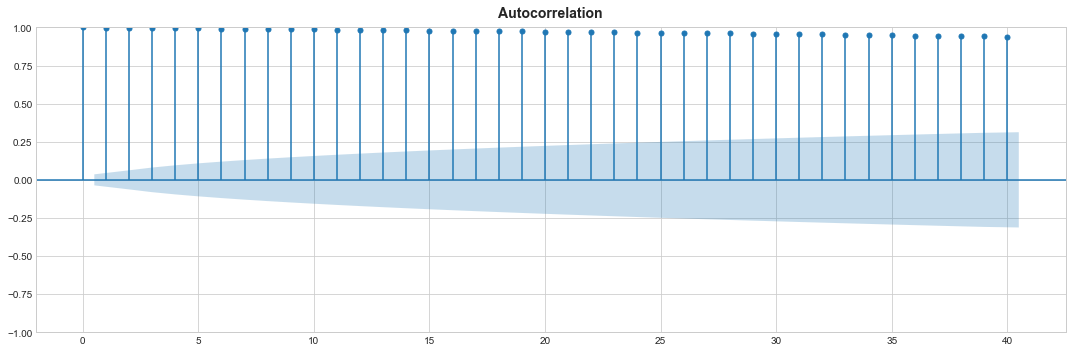

In [12]:
fig, ax = plt.subplots(figsize=(15, 5))
chart = plot_acf(train_df['price'],lags=40,ax=ax)

In [13]:
from scipy import stats
import statsmodels.api as sm

p = sm.tsa.stattools.adfuller(train_df['price'])[1]

print("Dickey–Fuller test: p=%f" % p)

if p < 0.05: 
    print("Series is stationarity !")
else:
    print("Series is not stationarity !")

Dickey–Fuller test: p=0.445651
Series is not stationarity !


Lấy sai phân lần 1
và xem lại biểu đồ ACF

In [14]:
train_df['price_diff_1'] = train_df['price'].diff()
# xóa bỏ hàng null
train_df.dropna(inplace=True)

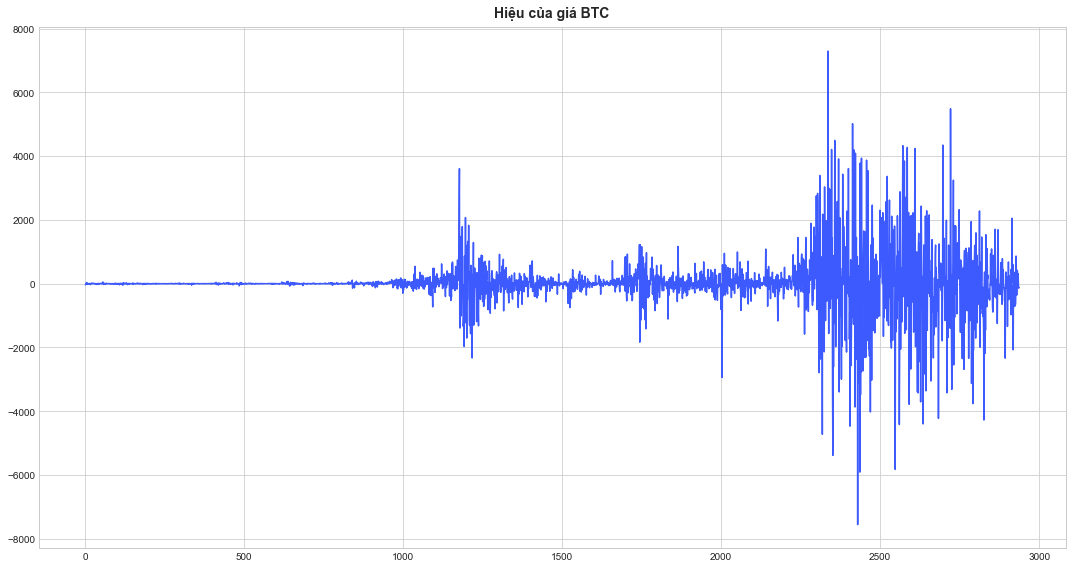

In [15]:
train_df['price_diff_1'].plot(color='#3d5afe')
cache=plt.title("Hiệu của giá BTC")

Dữ liệu chuỗi đã bắt đầu giao động quanh mức 0

Text(0.5, 1.0, 'ACF of difference level 1')

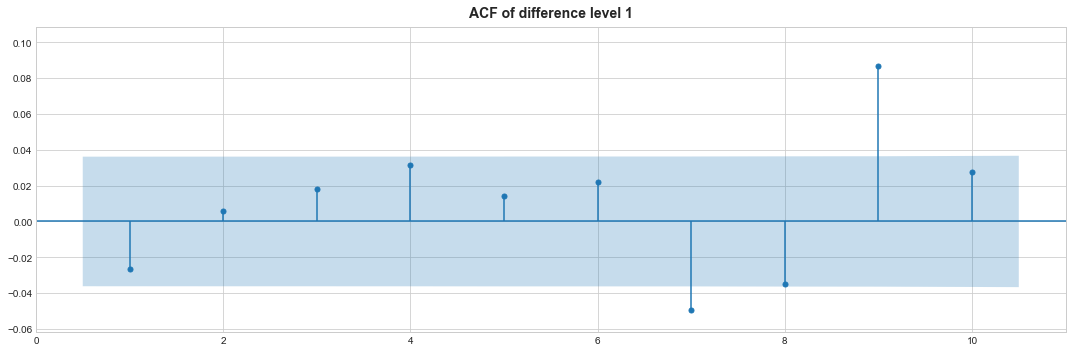

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))
chart = plot_acf(train_df['price_diff_1'],lags=range(1,11),ax=ax,auto_ylims=True)
plt.title("ACF of difference level 1")

Hệ số tượng quang đã có sự giảm mạnh (dies down) chuỗi có thể có khả năng dừng, để chắn chắn đây là độ sai khác
tốt nhất thì chúng ta sẽ lấy thêm một lần sai phân nữa để kiểm tra.

Text(0.5, 1.0, 'ACF of difference level 2')

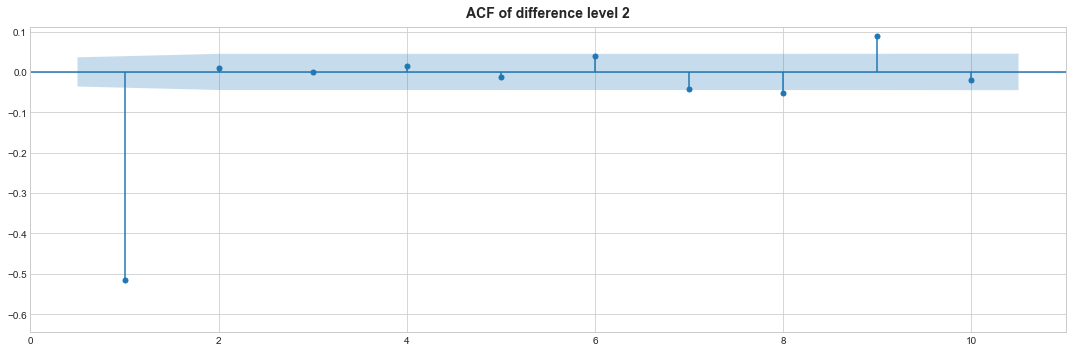

In [17]:
fig, ax = plt.subplots(figsize=(15, 5))
chart = plot_acf(train_df['price_diff_1'].diff().dropna(),lags=range(1,11),ax=ax,auto_ylims=True)
plt.title("ACF of difference level 2")

ACF của sai khác bậc 2 , ta nhận thấy hệ số tự tương của của độ trễ thứ nhất từ dương chuyển sang âm cho nên , dữ liệu đã bị 
overdifference quá mức cho nên hệ số sai phân (difference) băng 1 là hợp lí cho chuỗi dữ liệu dừng.


#### ADCF Test - Augmented Dickey–Fuller kiểm tra tính dừng của chuỗi

In [18]:
from scipy import stats
import statsmodels.api as sm

p = sm.tsa.stattools.adfuller(train_df['price_diff_1'])[1]

print("Dickey–Fuller test: p=%f" % p)

if p < 0.05: 
    print("Series is stationarity !")
else:
    print("Series is not stationarity !")

Dickey–Fuller test: p=0.000000
Series is stationarity !


##### Kết luận hệ số sai phân (difference) 1 là tốt nhất để ổn định chuỗi dữ liệu trước khi ta thực hiện xây dựng mô hình ARIMA với tham số **d=1**
Cách xác định được lấy từ nguồn tham khảo [Identifying the order of differencing in an ARIMA model](https://people.duke.edu/~rnau/411arim2.htm)